# 🤖 Project: AI-generated text detection
--------------------------------

**Dr. Dave Wanik - (OPIM 5512: Data Science Using Python) AND (OPIM 5509: Introduction to Deep Learning) - University of Connecticut**

Can you predict the 'ind' (0= human, 1 = AI) as a function of the 768 document embeddings, the word count and the punctuation? Be careful - there is imbalanced data which may require some advanced methods in order to get a reasonable model. Can you beat a naive (majority class) model or logistic regression? Now is your time to shine and apply everything you learned.

This project is being given to both classes simultaneously - however, you should only use the methods taught in each class. DS students must use only `sklearn` models, DL students must use `keras` models taught in class. DS students may use `XGBoost()` if they want, but this is at their own risk. `autoML` and `autokeras` may be used to fit models, but students still must be rigorous in their evaluation of the models.

Come to office hours EARLY with any questions that might pop up. See end of notebook for rubric.



*   Team Member Names: **Kanika Gaikwad, Kritika Gaikwad, Jonathan Stone**
*   Group Number: **Eleven (11)**
* My best F1 score on the test data was: **0.72**
  * (this must match the output in your script or you are in last place! - use `f1_score(y_test, test_preds)` to check your F1 score)



# 🔵 **Rubric**
## 1. Exploratory Data Analysis (20 pts)
* Make five meaningful plots and tables that show you have a good command of the dataset.
  * Use a nice variety of visualizations - don't just make five word clouds.

## 2. Prepare Data for Modeling (20 pts)
* You can be creative here - do as much or as little feature engineering as you want. You can use any feature engineering or dimension reduction methods you want (**so long as there isn't data leakage - automatic last place for data leakage**.) Experimentation is key and creativity will be rewarded with up to 10 bonus points if you do something amazing.
* Please use a 90/10 split and use random seed = 42. This way we can compare who has the best `f1_score(y_test,test_preds)` results.

## 3. Models (20 pts)
You can use everything except `ID` and `ind` (the target variable) as the  inputs into your model. You should use the methods for your respective class - ML models from `sklearn` for 5512 students, DL models from `keras` for 5509 students. 5512 students should not be building neural nets, and 5509 students should not be using random forests or logistic regression! You may submit other experiments as an appendix or another notebook. Your results must be reproducible and your entire notebook must be able to run or automatic last place.

We recommend using random seeds for reproducibility:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  * Note the `random_state` argument - just set it equal to 42 or whatever your favorite number is.
* https://keras.io/examples/keras_recipes/reproducibility_recipes/
  * It is more difficult to get consistent results with keras, pay attention to this blog to get models that have reproducibility.

## 4. Evaluation (20 pts)
For train and test partition, make sure you show:
* Learning curves for accuracy and loss (if you are in the 5509 class)
* Confusion matrices
* Classification reports
* Partial dependence and permutation importance (required for 5512 students, optional but encouraged for 5509 students)
* Analysis of the classification report, with emphasis on the precision, recall and F-1 score!
* Lots of text/narrative cells that explain what you are doing - it should read like a high-level report and not just be a bunch of random code.

## 5. Discussion/Conclusion (20 pts)
* It is my expectation that you spend time working on this to get the best performing model - do not start at the last minute and just blindly copy/paste code (big points off) - really get into the details and try to get the best model you can! You should use lots of subheaders so that your project is easy to grade. Write five bullets with two or three sentences per bullet. Tell me of all of the successes and failures you had while you were modeling, and tell me why you think your model is predicting the way that it does (feel free to add some extra plots or tables here if it will help!)

# 🛷 Sliding scale for grading (like a Kaggle competition)
* You are competing with each other for your grade. The best F1 score on the test data gets a 100, and the worst team will get an 80 right off the bat. I expect everything in this notebook to be PERFECT, otherwise extra points off.



# 🔵 **Import Modules and Import Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import other functions we'll need for classification modeling
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import pandas as pd
# https://drive.google.com/file/d/1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas/view?usp=sharing
#!gdown 1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas

In [ ]:
# unzip it
#!unzip ai-text-competition-data.zip

# read it
df = pd.read_csv('/content/drive/Shareddrives/Data Science Project/training_set.csv')

In [ ]:

print(df.shape)
df.head()

(11144, 772)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


In [ ]:
df.columns

Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_761', 'feature_762', 'feature_763', 'feature_764',
       'feature_765', 'feature_766', 'feature_767', 'word_count', 'punc_num',
       'ind'],
      dtype='object', length=772)

In [ ]:
# data types
df.dtypes

ID               int64
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
                ...   
feature_766    float64
feature_767    float64
word_count       int64
punc_num         int64
ind              int64
Length: 772, dtype: object

In [ ]:
# df.info() is the one stop shop for inspecting a data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 772 entries, ID to ind
dtypes: float64(768), int64(4)
memory usage: 65.6 MB


In [ ]:
# describe() gives summary statistics
df.describe()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
count,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,...,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000
mean,5572.500000,0.146012,-0.273505,-0.666907,-0.415562,-0.230934,-0.270790,-0.039869,-0.037003,0.101543,...,0.274985,0.687529,0.269849,0.199639,0.443093,0.078578,-0.062243,29.978643,7.347003,0.098708
std,3217.140034,0.389374,0.382566,0.432605,0.745149,0.583487,0.388663,0.292493,0.246509,0.503054,...,0.406760,0.431843,0.545066,0.304694,0.365657,0.551214,0.300848,10.271548,4.041350,0.298283
min,1.000000,-1.633110,-1.971542,-2.505377,-4.280401,-2.413613,-1.514833,-1.427118,-1.036038,-1.779871,...,-1.765492,-1.723701,-1.506003,-1.272904,-1.467510,-1.605773,-1.085949,5.000000,0.000000,0.000000
25%,2786.750000,-0.111816,-0.517288,-0.954874,-0.891329,-0.633606,-0.536751,-0.229016,-0.197038,-0.236033,...,-0.000389,0.392865,-0.125641,0.000539,0.208861,-0.303969,-0.273816,22.000000,4.000000,0.000000
50%,5572.500000,0.161513,-0.261028,-0.673000,-0.415641,-0.244129,-0.281473,-0.036129,-0.038384,0.068244,...,0.256874,0.683075,0.213906,0.205270,0.461389,0.021472,-0.074150,30.000000,7.000000,0.000000
75%,8358.250000,0.418461,-0.016541,-0.381686,0.078408,0.168207,-0.018891,0.157572,0.117311,0.399803,...,0.535327,0.981356,0.634109,0.400167,0.692926,0.405299,0.129446,38.000000,10.000000,0.000000
max,11144.000000,1.378549,1.376324,1.392311,2.184251,1.659698,1.667419,1.070739,1.320982,2.456948,...,1.987709,1.965830,2.582598,1.375909,1.879438,2.579186,1.674109,57.000000,27.000000,1.000000


# 🔵 **EDA**


1.   Target Variable Distribution Analysis:
Examined the distribution of values (0s and 1s) in the target variable 'ind' to understand the class balance or imbalance within the dataset.


2.   Top Feature Spread Exploration:
Investigated the distribution of the top 10 features exhibiting the highest variability or spread across the dataset.

3.    Punctuation Number Distribution:
Employed a histogram to visually illustrate the contrast in punctuation usage between AI-generated and human-generated text

4.    Word Count Distribution:
Created the histogram to compare human-generated vs AI-generated text based on word count.

5.    Spread of Top Features by RFC (Random Forest Classifier):
Explored the spread and distribution patterns of the top 8 features(other than word count and puntuation count) identified by the Random Forest Classifier (RFC).

6.    Correlated Feature Visualization:
Constructed scatter plots to visualize the relationships and correlations between features, particularly focusing on those features displaying strong correlations. This aided in understanding how certain features interrelate within the dataset.

The data is cleaned dataset and has zero null values.


In [ ]:
# missing values by column
df.isnull().sum()

ID             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_766    0
feature_767    0
word_count     0
punc_num       0
ind            0
Length: 772, dtype: int64

In [ ]:
# missing values in entire dataframe
df.isnull().sum().sum()

0

## 🔴 *Target Variable Distribution*

Target Variable Distribution:
0    10044
1     1100
Name: ind, dtype: int64


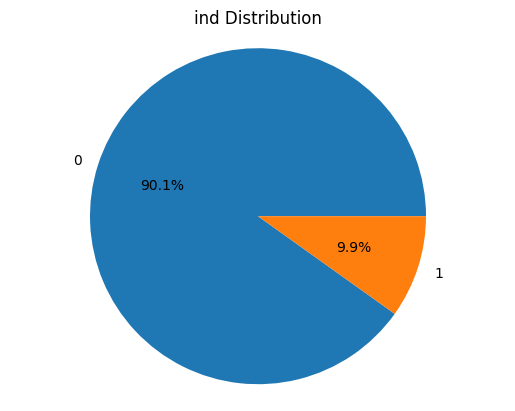

In [ ]:
target_distribution = df['ind'].value_counts()
print("Target Variable Distribution:")
print(target_distribution)

import matplotlib.pyplot as plt
# Define colors for the pie chart slices
#colors = ['blue', 'red']

# Plotting a pie chart for target variable distribution with specified colors
target_distribution.plot(kind='pie', title='ind Distribution', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('')  # Remove the label on y-axis
plt.show()

> The target variable 'ind' has a 90/10 distribution.
* Human Generated Text = 0  - Is the majority class with 90.1%
* AI Generated Text = 1 - Is the minority class with 9.9%

## 🔴 *Distribution of Variables with Maximum Spread*

In [ ]:
spreads = df.max() - df.min() # Spread is defined as the difference between maximum and minimum of each features

In [ ]:
# Sorting the spreads in descending order
sorted_spreads = spreads.sort_values(ascending=False)

In [ ]:
# Filtering to include only columns that start with 'feature_'
feature_spreads = sorted_spreads[sorted_spreads.index.str.startswith('feature_')]

print(feature_spreads.head(10))

feature_497    21.722439
feature_27     10.814294
feature_736    10.130008
feature_234     8.290108
feature_574     7.994954
feature_41      6.813505
feature_442     6.717974
feature_35      6.587266
feature_218     6.518255
feature_3       6.464652
dtype: float64


In [ ]:
# Selecting the top 10 feature spreads
top_10_feature_spreads = feature_spreads.head(10).reset_index()

# Renaming the columns of the selected top 10 feature spreads DataFrame for clarity
top_10_feature_spreads.columns = ['Feature', 'Spread']


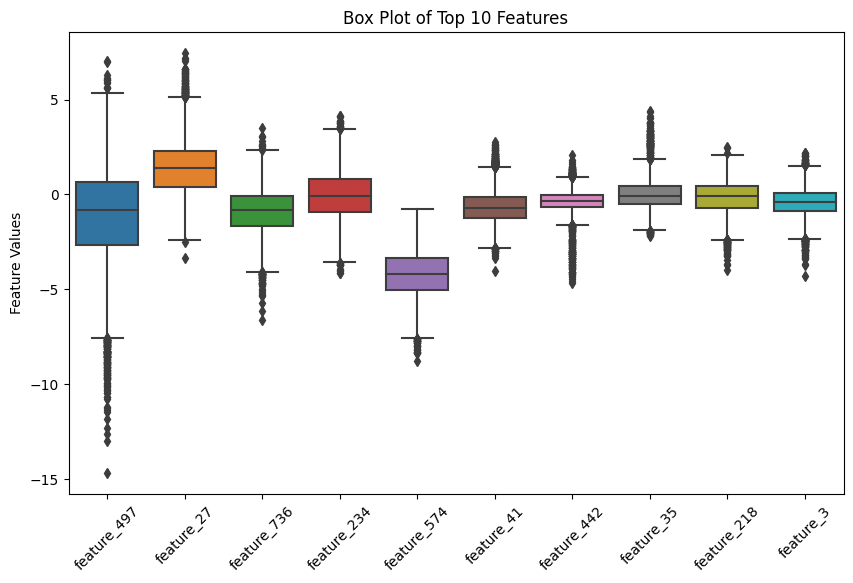

In [ ]:
# Plotting the top 10 features with maximum features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[top_10_feature_spreads['Feature']])
plt.title('Box Plot of Top 10 Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['feature_497'].describe()

count    11144.000000
mean        -1.141808
std          2.536123
min        -14.688266
25%         -2.645175
50%         -0.819491
75%          0.634934
max          7.034173
Name: feature_497, dtype: float64

> The above visualization illustrates the features in the data set with the widest spread.

> The visualization indentifie the features with maximum spreads and a clear representation of the distribution characteristics.

> For instance, 'feature_497' demonstrates the highest spread. It has a mean value of -1.14 and a standard deviation of 2.53. The values for this feature range from -14.68 to 7.03, indicating substantial variability.

## 🔴 *Punctuation Count Histogram*


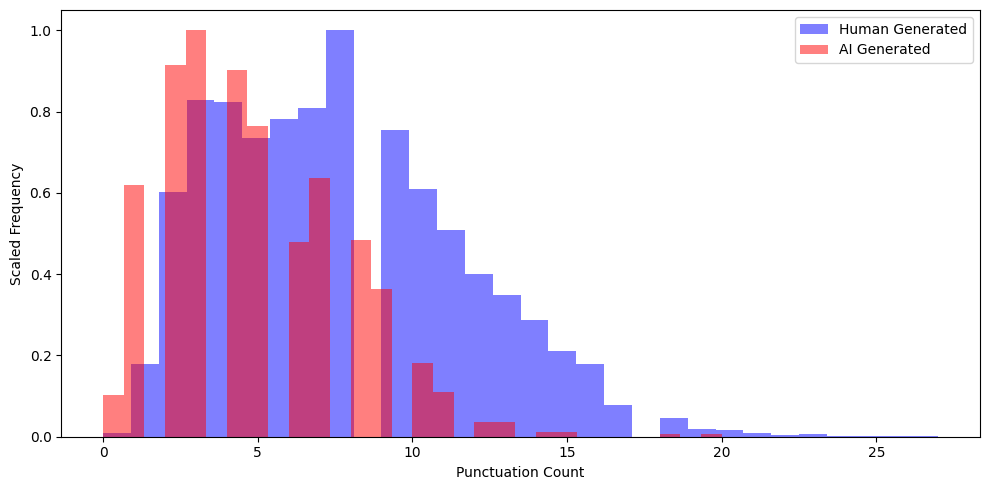

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the number of bins for the histogram
n_bins = 30

# Plot the histogram and get the bin counts and edges for punctuation count
human_punc_counts, human_punc_bins = np.histogram(df[df['ind'] == 0]['punc_num'], bins=n_bins)
ai_punc_counts, ai_punc_bins = np.histogram(df[df['ind'] == 1]['punc_num'], bins=n_bins)

# Scale the bin counts to get scaled frequencies
human_scaled_punc_freq = scaler.fit_transform(human_punc_counts.reshape(-1, 1)).flatten()
ai_scaled_punc_freq = scaler.fit_transform(ai_punc_counts.reshape(-1, 1)).flatten()

# Calculate the bin midpoints for plotting
human_punc_bin_midpoints = (human_punc_bins[:-1] + human_punc_bins[1:]) / 2
ai_punc_bin_midpoints = (ai_punc_bins[:-1] + ai_punc_bins[1:]) / 2

# Plotting the scaled frequencies against the bin midpoints
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the scaled frequency histograms
ax.bar(human_punc_bin_midpoints, human_scaled_punc_freq, width=(human_punc_bins[1] - human_punc_bins[0]), alpha=0.5, label='Human Generated', color='blue')
ax.bar(ai_punc_bin_midpoints, ai_scaled_punc_freq, width=(ai_punc_bins[1] - ai_punc_bins[0]), alpha=0.5, label='AI Generated', color='red')

# Add labels and legend
ax.set_xlabel('Punctuation Count')
ax.set_ylabel('Scaled Frequency')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


> The key feature of this visual is that the AI-generated text has less punctuation. Both Human and AI-generated texts seem to have a common range where punctuation count frequency, peaking around the count of 3-8.

> Additionally, both histograms display a right-skewed distribution. This skewness suggests that while the majority of instances within Human and AI Generated text have lower punctuation counts, there are occasional instances with notably higher punctuation counts, resulting in the tail of the distribution stretching towards the higher values.

## 🔴 *Word Count Histogram*


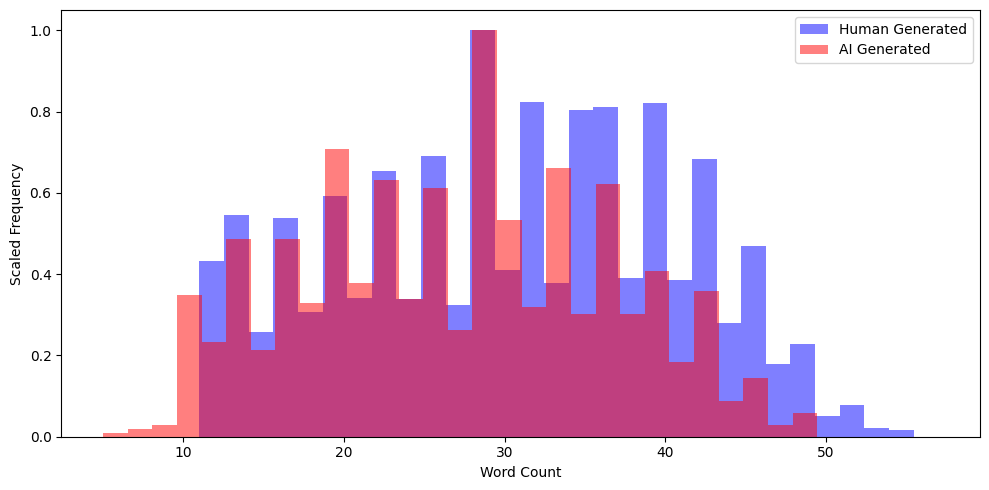

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the number of bins for the histogram
n_bins = 30

# Plot the histogram and get the bin counts and edges
human_counts, human_bins = np.histogram(df[df['ind'] == 0]['word_count'], bins=n_bins)
ai_counts, ai_bins = np.histogram(df[df['ind'] == 1]['word_count'], bins=n_bins)

# Scale the bin counts to get scaled frequencies
human_scaled_freq = scaler.fit_transform(human_counts.reshape(-1, 1)).flatten()
ai_scaled_freq = scaler.fit_transform(ai_counts.reshape(-1, 1)).flatten()

# Calculate the bin midpoints for plotting
human_bin_midpoints = (human_bins[:-1] + human_bins[1:]) / 2
ai_bin_midpoints = (ai_bins[:-1] + ai_bins[1:]) / 2

# Plotting the scaled frequencies against the bin midpoints
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the scaled frequency histograms
ax.bar(human_bin_midpoints, human_scaled_freq, width=(human_bins[1] - human_bins[0]), alpha=0.5, label='Human Generated', color='blue')
ax.bar(ai_bin_midpoints, ai_scaled_freq, width=(ai_bins[1] - ai_bins[0]), alpha=0.5, label='AI Generated', color='red')

# Add labels and legend
ax.set_xlabel('Word Count')
ax.set_ylabel('Scaled Frequency')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


 Human-generated texts show instances of very high word counts (40-50 words), which are not as prevalent in AI-generated texts. AI generated texts seem to have a higher frequency of shorter texts (around 10-20 words).

 If comparing to the previous histogram on punctuation, an interesting observation is that despite having a tendency for shorter texts, AI-generated text had fewer punctuations. This could mean that AI-generated text have less variation in sentence structure.

# 🔵 **Data Preparation**

The first step is to set predictor variables, X, and target variable, Y.

> Set the target variable (y) = 'ind'

> Set the predictor variable (X) = to the remaining features after dropping 'ind'

> Additionally 'ID' was excluded


## 🔴 *Define X and Y variables*



In [ ]:
# See, we have 11,144 rows and 772 columns

df.shape

# Looks good! We are looking to have 10X as many rows as columns

(11144, 772)

In [ ]:
# our target variable is 'ind'
# lets set X and y

X = df.drop('ind', axis=1)

y = df['ind']

print(X.shape, y.shape)

(11144, 771) (11144,)


In [ ]:
X = X.drop('ID', axis=1) # Removing the 'ID' column from X

In [ ]:
X.shape

(11144, 770)

In [ ]:
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,-1.161955,...,0.107465,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14
1,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,-1.157622,...,-1.292380,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4
2,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,-1.646261,...,-0.836793,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8
3,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,-1.609315,...,-1.251496,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3
4,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,-1.745294,...,-0.386237,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9


## 🔴 *Split the Data*



In [ ]:
# Splitting the dataset into training and testing sets (X_train_plain and X_test_plain) along with their corresponding target variables (y_train_plain and y_test_plain)
# The test size is set to 0.1, indicating a 90-10 split for training and testing respectively
X_train_plain, X_test_plain, y_train_plain, y_test_plain = train_test_split(
                                                        X, y,
                                                        test_size=0.1,
                                                        random_state=42)

In [ ]:
# check to see shape vs our expectations
print(X_train_plain.shape, X_test_plain.shape, y_train_plain.shape, y_test_plain.shape)

(10029, 770) (1115, 770) (10029,) (1115,)


In [ ]:
# Peak at the first 5 rows
X_train_plain.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
11043,0.340939,-0.057671,-0.800137,-1.492317,-0.308187,-0.790117,-0.450816,-0.172626,0.087146,-1.190476,...,-0.966914,0.894735,0.257007,-0.606700,0.528715,-0.232347,0.015510,-0.075439,34,6
4165,-0.200836,-0.432826,-0.749740,0.234486,0.332252,0.330867,-0.921779,0.358875,0.747452,-1.622976,...,-0.762513,0.333061,0.203570,1.648709,-0.541725,0.232333,0.893527,0.879266,15,4
6844,0.851236,-0.310664,-0.389326,-0.981194,-0.144302,0.027253,-0.186483,0.165053,0.475517,-1.124888,...,-1.612879,0.273100,0.853658,-0.084791,-0.035700,-0.238388,0.373952,0.145611,28,8
3287,-0.477962,-0.501203,-1.077772,-0.889095,-0.519096,-0.148177,-0.185129,0.190657,0.323154,-1.211236,...,-0.285933,0.294913,0.480127,-0.119596,0.067996,0.705456,-0.285733,-0.151135,41,4
4098,0.602829,-0.028369,-0.321926,1.511154,-0.001043,-0.379546,-0.127575,0.197656,-0.121896,-1.304630,...,-0.173687,0.186675,0.543543,0.798403,0.169161,0.393791,0.891687,-0.030052,17,6


## 🔴 *Min Max Scaling*

In [ ]:
# MinMaxScale was imported at the top of our script

scaler = MinMaxScaler()

X_train_plain = scaler.fit_transform(X_train_plain)
X_test_plain = scaler.transform(X_test_plain)

# the scaler function converts it to a numpy array, which destroys the column names

In [ ]:
# Converting the training and testing sets (X_train_plain and X_test_plain)
X_train_plain = pd.DataFrame(X_train_plain)
X_test_plain = pd.DataFrame(X_test_plain)


In [ ]:
X_train_plain.columns= X.columns

# Assigning column names from the original dataset (X) to the training set (X_train_plain)

In [ ]:
X_train_plain.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,0.655469,0.571669,0.437500,0.431281,0.516883,0.227737,0.390856,0.366315,0.440665,0.525657,...,0.450883,0.690150,0.536845,0.193591,0.680161,0.369042,0.387407,0.366119,0.557692,0.222222
1,0.475576,0.459611,0.450430,0.698396,0.674111,0.579998,0.202309,0.591812,0.596514,0.436085,...,0.502170,0.509329,0.522362,0.763868,0.276040,0.507878,0.597210,0.712019,0.192308,0.148148
2,0.824909,0.496100,0.542899,0.510346,0.557117,0.484590,0.496680,0.509580,0.532331,0.539241,...,0.288800,0.490026,0.698560,0.325555,0.467079,0.367236,0.473057,0.446208,0.442308,0.296296
3,0.383559,0.439187,0.366270,0.524592,0.465105,0.429462,0.497222,0.520443,0.496369,0.521358,...,0.621751,0.497048,0.597319,0.316754,0.506227,0.649238,0.315425,0.338694,0.692308,0.148148
4,0.742428,0.580421,0.560191,0.895880,0.592287,0.356756,0.520263,0.523413,0.391325,0.502016,...,0.649915,0.462203,0.614507,0.548869,0.544419,0.556119,0.596771,0.382563,0.230769,0.222222


In [ ]:
X_test_plain.columns= X.columns

 # Assigning column names from the original dataset (X) to the test set (X_test_plain)

In [ ]:
X_test_plain.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,0.425014,0.401737,0.410918,0.533986,0.400361,0.423065,0.587398,0.531894,0.348364,0.408984,...,0.616576,0.305718,0.664769,0.203457,0.608565,0.703037,0.252738,0.460342,0.692308,0.407407
1,0.657262,0.414749,0.337352,0.585590,0.522065,0.357886,0.569285,0.550663,0.515529,0.409578,...,0.564821,0.482286,0.833768,0.403835,0.550287,0.615103,0.435943,0.275018,0.519231,0.370370
2,0.658229,0.442792,0.478777,0.521623,0.668418,0.392573,0.426458,0.498821,0.324815,0.525789,...,0.390246,0.634850,0.812869,0.424859,0.545347,0.535404,0.416141,0.340603,0.480769,0.259259
3,0.681207,0.419152,0.402683,0.495304,0.388502,0.336535,0.503727,0.276943,0.405781,0.429497,...,0.487737,0.572335,0.650607,0.325640,0.747587,0.743194,0.129796,0.349902,0.442308,0.333333
4,0.705325,0.668497,0.464115,0.585991,0.355844,0.357613,0.579089,0.489179,0.344696,0.480179,...,0.558720,0.539014,0.777854,0.347631,0.511490,0.678346,0.316088,0.487290,0.480769,0.296296




## 🔴 *Top 10 Features*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit a RandomForestClassifier
rf_model = RandomForestClassifier(random_state= 42)
rf_model.fit(X_train_plain, y_train_plain)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_plain.columns)

# Sort features based on importance
top_features = feature_importances.sort_values(ascending=False).head(10)  # Adjust the number as needed
print("The top 10 features are: \n",top_features)

The top 10 features are: 
 feature_44     0.014582
feature_283    0.007950
feature_574    0.006916
feature_174    0.005713
feature_135    0.005091
punc_num       0.004993
word_count     0.004745
feature_365    0.004666
feature_81     0.004639
feature_25     0.004394
dtype: float64


In [ ]:
# make a dataframe with the top 10 most important features
X_top_10= X_train_plain[["feature_44","feature_81","feature_574","feature_283","feature_135","punc_num","feature_174","word_count","feature_586","feature_365"]]

In [ ]:
X_top_10.head()

,feature_44,feature_81,feature_574,feature_283,feature_135,punc_num,feature_174,word_count,feature_586,feature_365
0,0.492635,0.457166,0.556529,0.318785,0.469994,0.222222,0.567776,0.557692,0.647475,0.381123
1,0.671670,0.452540,0.406590,0.580374,0.539477,0.148148,0.289397,0.192308,0.360650,0.548935
2,0.660793,0.493941,0.585691,0.406131,0.405517,0.296296,0.574162,0.442308,0.570154,0.364738
3,0.217338,0.435685,0.835607,0.356736,0.515929,0.148148,0.407583,0.692308,0.822244,0.367419
4,0.433893,0.587588,0.454761,0.680061,0.585610,0.222222,0.630027,0.230769,0.878255,0.425755


In [ ]:
X_top_10.describe

<bound method NDFrame.describe of        feature_44  feature_81  feature_574  feature_283  feature_135  \
0        0.492635    0.457166     0.556529     0.318785     0.469994   
1        0.671670    0.452540     0.406590     0.580374     0.539477   
2        0.660793    0.493941     0.585691     0.406131     0.405517   
3        0.217338    0.435685     0.835607     0.356736     0.515929   
4        0.433893    0.587588     0.454761     0.680061     0.585610   
...           ...         ...          ...          ...          ...   
10024    0.382891    0.493766     0.407662     0.582847     0.554004   
10025    0.689145    0.550249     0.509548     0.552485     0.381053   
10026    0.299210    0.079509     0.806994     0.552872     0.544755   
10027    0.719661    0.445623     0.704270     0.288043     0.478814   
10028    0.362161    0.511905     0.607816     0.503687     0.459409   

       punc_num  feature_174  word_count  feature_586  feature_365  
0      0.222222     0.567776    

> After extracting the top 10 features using the Random Forest Classifier (RFC), we discovered that these features encompass word count and punctuation counts. Our current objective is to explore the distribution patterns of these top 10 features. As we've already examined the distribution of both word count and punctuation numbers, we are excluding them from this particular analysis to focus on the remaining eight features within this subset.

In [ ]:
# Drop punc_num and word_count from top 10
X_top_8 = X_top_10.drop(["punc_num", "word_count"], axis=1)


### 🟡 Boxplot of Top 8 variables on RFC


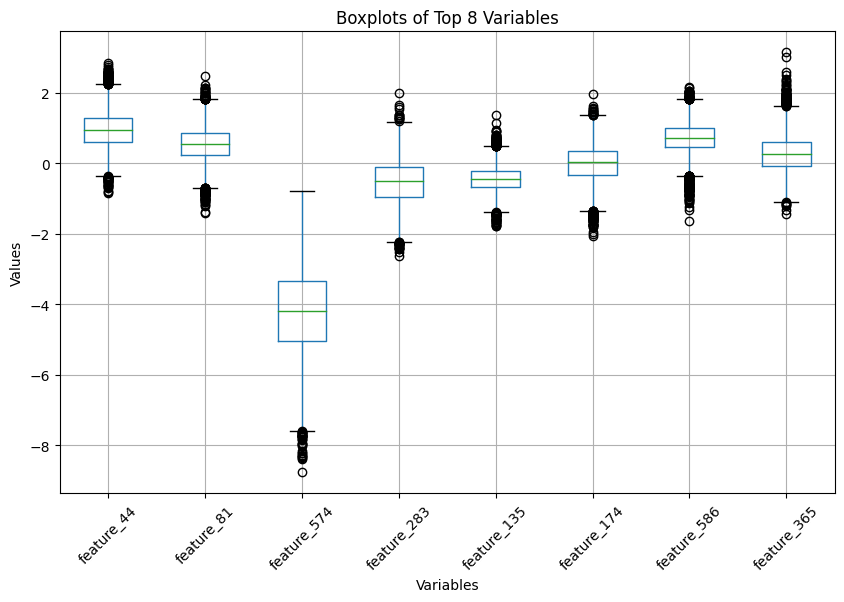

In [ ]:
import matplotlib.pyplot as plt

# storing the top 8 column names into list
top_8_columns = X_top_8.columns.tolist()

# Plotting boxplots for the top 10 variables
plt.figure(figsize=(10, 6))
X[top_8_columns].boxplot()
plt.title('Boxplots of Top 8 Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

> The provided box plots illustrate the distribution of the top 8 features identified by the Random Forest Classifier (RFC).

> In general, the majority of features exhibit values ranging between -2 to 3. However, there is a notable exception observed in 'feature_574', which demonstrates a different distribution pattern. This particular feature showcases a wider range, with its minimum values spanning from -10 to -1, setting it apart from the typical range observed across the other features.

## 🔴 *Correlation Matrix*

> The code conducts a correlation analysis to identify highly correlated features with a correlation coefficient greater than 0.75. Subsequently, it identifies pairs of features displaying significant correlation and proceeds to remove these correlated features from both the training and test datasets. This process aims to reduce the number of features, mitigating multicollinearity concerns and enhancing the dataset's suitability for subsequent modeling or analysis.

In [ ]:
# Set the threshold value of 0.75 for correlation
threshold = 0.75

# Calculating the correlation matrix after scaling
correlation_matrix = X_train_plain.corr().abs()

# Finding columns with correlations above the threshold
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Create a set to hold the features to drop
features_to_drop = set()

for column in upper_tri.columns:
    correlated_features = list(upper_tri.index[upper_tri[column] > threshold])
    if correlated_features:
        # Include all highly correlated features above the threshold
        features_to_drop.update(correlated_features[1:])  # Update the set with correlated features except the first one


In [ ]:
correlated_pairs = []

for column in upper_tri.columns:
    correlated_features = upper_tri.index[upper_tri[column] > threshold]
    if correlated_features.any():
        # Collect pairs of highly correlated features
        pairs = [(column, corr_feature) for corr_feature in correlated_features]
        correlated_pairs.extend(pairs)

# Convert the list of correlated pairs to a DataFrame
correlated_pairs_df = pd.DataFrame(correlated_pairs, columns=['Feature 1','Feature 2']) # ,'Feature 2']
print(correlated_pairs_df)


      Feature 1    Feature 2
0   feature_167  feature_133
1   feature_234   feature_27
2   feature_280  feature_218
3   feature_411   feature_11
4   feature_519  feature_409
5   feature_534   feature_82
6   feature_534  feature_369
7   feature_579  feature_167
8   feature_579  feature_369
9   feature_579  feature_466
10  feature_579  feature_534
11  feature_593   feature_29
12  feature_714   feature_82
13  feature_714  feature_369
14  feature_714  feature_409
15  feature_714  feature_534
16  feature_721  feature_167
17  feature_759   feature_27
18  feature_759  feature_133
19  feature_759  feature_218
20  feature_759  feature_234
21  feature_759  feature_280
22  feature_759  feature_311
23  feature_759  feature_522
24  feature_759  feature_714


> The output displayed provides insight into pairs of features that exhibit high correlation. These pairs, identified as highly correlated based on the threshold of 0.75.

> This signifies features within the dataset that showcase strong linear relationships with each other.

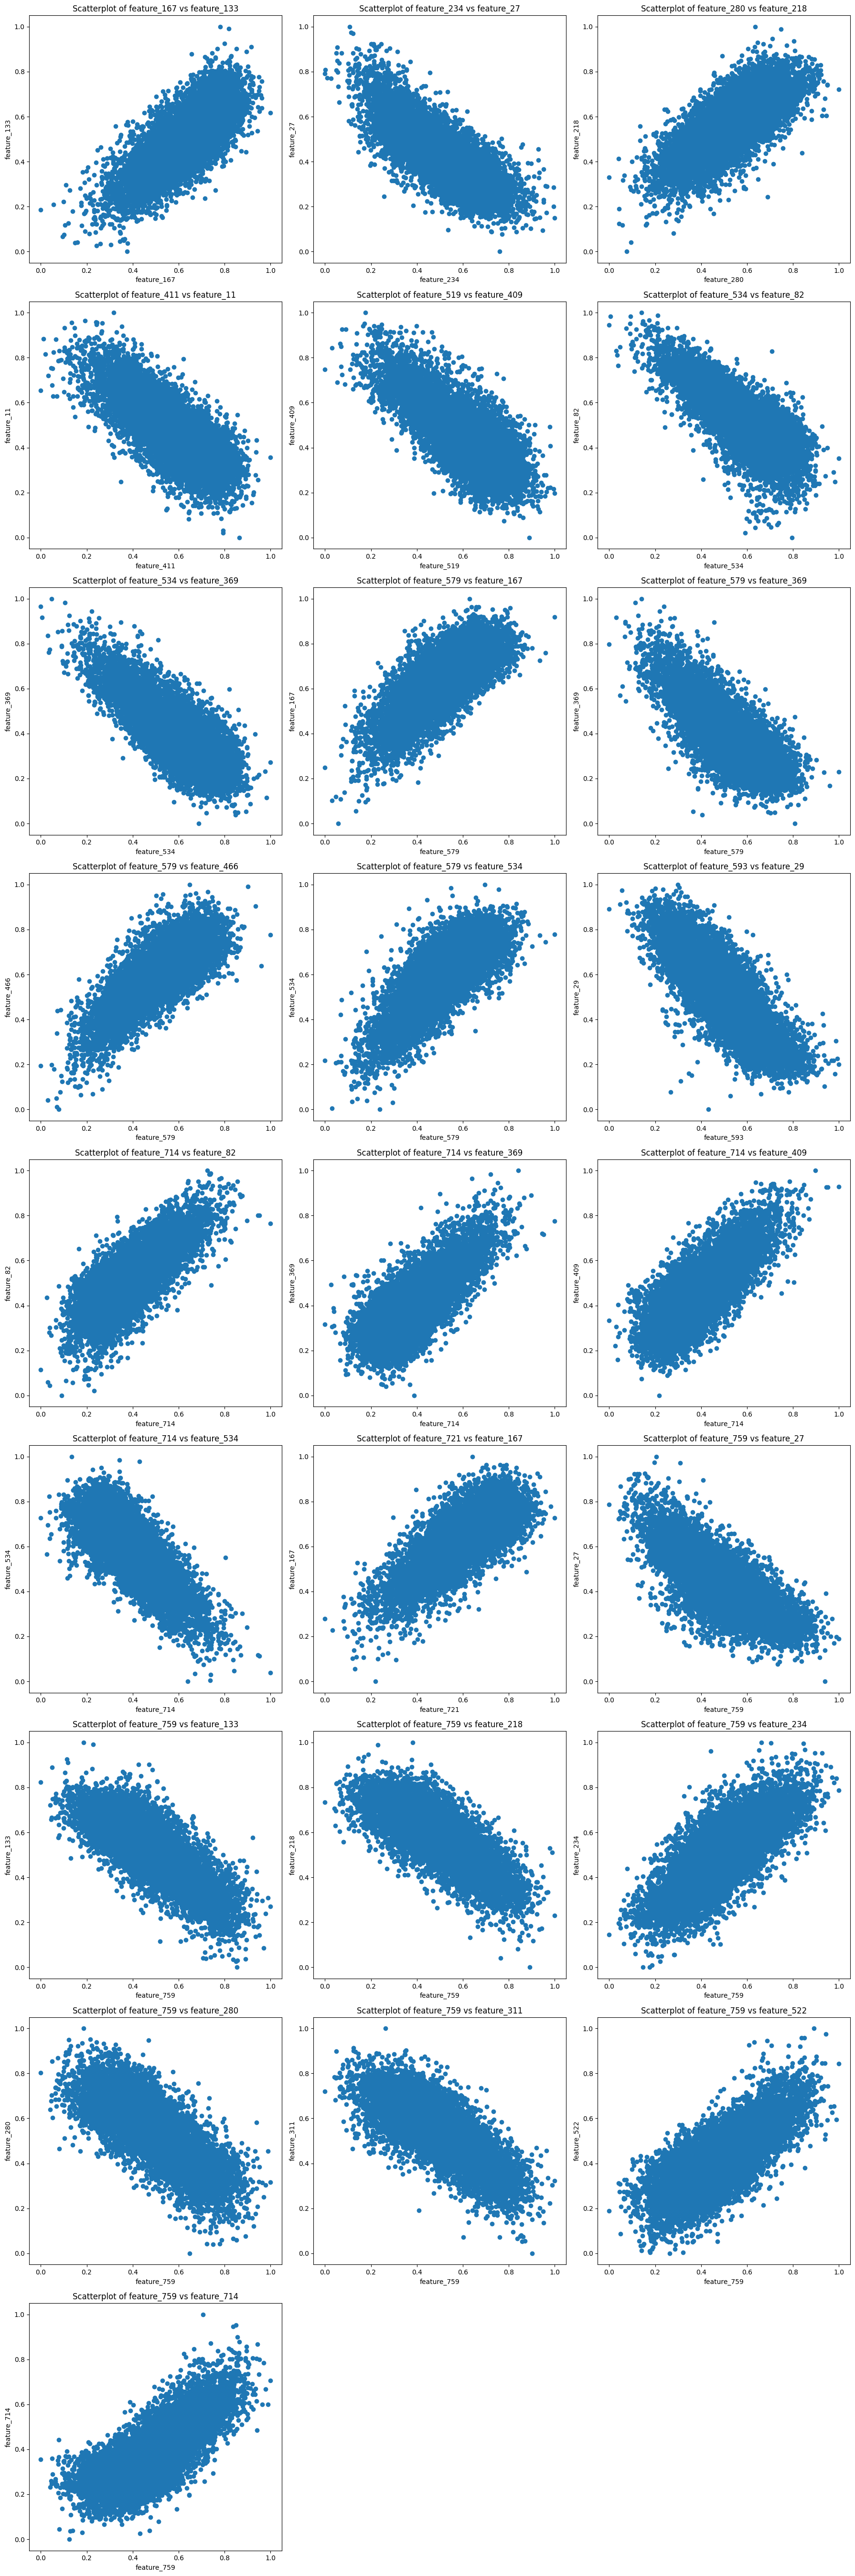

In [ ]:
# Assuming 'X_train_plain' and 'correlated_pairs_df' are available as described in your code

num_plots = len(correlated_pairs_df)

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(num_plots / 3))  # Increased number of columns per row to 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))  # Larger figure size

for idx, row in correlated_pairs_df.iterrows():
    feature_1 = row['Feature 1']
    feature_2 = row['Feature 2']
    ax = axes[idx // num_cols, idx % num_cols]

    ax.scatter(X_train_plain[feature_1], X_train_plain[feature_2])
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.set_title(f'Scatterplot of {feature_1} vs {feature_2}')

# Hide empty subplots if any
for i in range(num_plots, num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()
plt.show()


> The scatter plots above exhibit the relationships between correlated features, offering insights into how alterations in one feature may influence or affect another closely correlated feature. These visualizations enable an understanding of the directional impact and changes between pairs of features, illustrating their interdependence and providing valuable clues on potential behavior or patterns within the dataset.

In [ ]:
features_to_drop # Checking the features to drop

{'feature_133',
 'feature_218',
 'feature_234',
 'feature_280',
 'feature_311',
 'feature_369',
 'feature_409',
 'feature_466',
 'feature_522',
 'feature_534',
 'feature_714'}

In [ ]:
# Dropping highly correlated columns from the scaled data
X_train_plain = X_train_plain.drop(columns=features_to_drop, axis=1)
X_test_plain = X_test_plain.drop(columns=features_to_drop, axis=1)

In [ ]:
print(X_train_plain.shape)
X_train_plain.head()

(10029, 759)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,0.655469,0.571669,0.437500,0.431281,0.516883,0.227737,0.390856,0.366315,0.440665,0.525657,...,0.450883,0.690150,0.536845,0.193591,0.680161,0.369042,0.387407,0.366119,0.557692,0.222222
1,0.475576,0.459611,0.450430,0.698396,0.674111,0.579998,0.202309,0.591812,0.596514,0.436085,...,0.502170,0.509329,0.522362,0.763868,0.276040,0.507878,0.597210,0.712019,0.192308,0.148148
2,0.824909,0.496100,0.542899,0.510346,0.557117,0.484590,0.496680,0.509580,0.532331,0.539241,...,0.288800,0.490026,0.698560,0.325555,0.467079,0.367236,0.473057,0.446208,0.442308,0.296296
3,0.383559,0.439187,0.366270,0.524592,0.465105,0.429462,0.497222,0.520443,0.496369,0.521358,...,0.621751,0.497048,0.597319,0.316754,0.506227,0.649238,0.315425,0.338694,0.692308,0.148148
4,0.742428,0.580421,0.560191,0.895880,0.592287,0.356756,0.520263,0.523413,0.391325,0.502016,...,0.649915,0.462203,0.614507,0.548869,0.544419,0.556119,0.596771,0.382563,0.230769,0.222222


In [ ]:
print(X_test_plain.shape)
X_test_plain.head()

(1115, 759)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,0.425014,0.401737,0.410918,0.533986,0.400361,0.423065,0.587398,0.531894,0.348364,0.408984,...,0.616576,0.305718,0.664769,0.203457,0.608565,0.703037,0.252738,0.460342,0.692308,0.407407
1,0.657262,0.414749,0.337352,0.585590,0.522065,0.357886,0.569285,0.550663,0.515529,0.409578,...,0.564821,0.482286,0.833768,0.403835,0.550287,0.615103,0.435943,0.275018,0.519231,0.370370
2,0.658229,0.442792,0.478777,0.521623,0.668418,0.392573,0.426458,0.498821,0.324815,0.525789,...,0.390246,0.634850,0.812869,0.424859,0.545347,0.535404,0.416141,0.340603,0.480769,0.259259
3,0.681207,0.419152,0.402683,0.495304,0.388502,0.336535,0.503727,0.276943,0.405781,0.429497,...,0.487737,0.572335,0.650607,0.325640,0.747587,0.743194,0.129796,0.349902,0.442308,0.333333
4,0.705325,0.668497,0.464115,0.585991,0.355844,0.357613,0.579089,0.489179,0.344696,0.480179,...,0.558720,0.539014,0.777854,0.347631,0.511490,0.678346,0.316088,0.487290,0.480769,0.296296


In [ ]:
X_train_plain.shape

(10029, 759)

In [ ]:
X_train_plain.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,0.655469,0.571669,0.437500,0.431281,0.516883,0.227737,0.390856,0.366315,0.440665,0.525657,...,0.450883,0.690150,0.536845,0.193591,0.680161,0.369042,0.387407,0.366119,0.557692,0.222222
1,0.475576,0.459611,0.450430,0.698396,0.674111,0.579998,0.202309,0.591812,0.596514,0.436085,...,0.502170,0.509329,0.522362,0.763868,0.276040,0.507878,0.597210,0.712019,0.192308,0.148148
2,0.824909,0.496100,0.542899,0.510346,0.557117,0.484590,0.496680,0.509580,0.532331,0.539241,...,0.288800,0.490026,0.698560,0.325555,0.467079,0.367236,0.473057,0.446208,0.442308,0.296296
3,0.383559,0.439187,0.366270,0.524592,0.465105,0.429462,0.497222,0.520443,0.496369,0.521358,...,0.621751,0.497048,0.597319,0.316754,0.506227,0.649238,0.315425,0.338694,0.692308,0.148148
4,0.742428,0.580421,0.560191,0.895880,0.592287,0.356756,0.520263,0.523413,0.391325,0.502016,...,0.649915,0.462203,0.614507,0.548869,0.544419,0.556119,0.596771,0.382563,0.230769,0.222222


In [ ]:
X_test_plain.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,0.425014,0.401737,0.410918,0.533986,0.400361,0.423065,0.587398,0.531894,0.348364,0.408984,...,0.616576,0.305718,0.664769,0.203457,0.608565,0.703037,0.252738,0.460342,0.692308,0.407407
1,0.657262,0.414749,0.337352,0.585590,0.522065,0.357886,0.569285,0.550663,0.515529,0.409578,...,0.564821,0.482286,0.833768,0.403835,0.550287,0.615103,0.435943,0.275018,0.519231,0.370370
2,0.658229,0.442792,0.478777,0.521623,0.668418,0.392573,0.426458,0.498821,0.324815,0.525789,...,0.390246,0.634850,0.812869,0.424859,0.545347,0.535404,0.416141,0.340603,0.480769,0.259259
3,0.681207,0.419152,0.402683,0.495304,0.388502,0.336535,0.503727,0.276943,0.405781,0.429497,...,0.487737,0.572335,0.650607,0.325640,0.747587,0.743194,0.129796,0.349902,0.442308,0.333333
4,0.705325,0.668497,0.464115,0.585991,0.355844,0.357613,0.579089,0.489179,0.344696,0.480179,...,0.558720,0.539014,0.777854,0.347631,0.511490,0.678346,0.316088,0.487290,0.480769,0.296296


**Identification of Highly Correlated Features:**

The correlation matrix (styled_corr) shows pairs of variables that are highly correlated. The specified threshold of 0.75 indicates that variables with a correlation value greater than 0.75 are considered correlated.
* For instance, if a pair such as 'feature_133' and 'feature_167' has a correlation value of 0.751, the two variables are correlated.

**Dimension Reduction by Dropping Correlated Features:**

To mitigate multicollinearity and reduce dimensionality, one of the two features from each pair is dropped.

* The code generates a DataFrame, corr_features, containing columns representing the highly correlated features. After removing these correlated features from both the training and test datasets, the final datasets contain 759 features.

# 🔵 **Feature Engineering**

## 🔴 *PCA*

Principal Componant Analysis - Dimensionality Reduction.

---

Upon implementing Principal Component Analysis (PCA) with the objective of retaining 95% variance, we successfully reduced our dataset from 759 variables to 245 principal components.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) # this means keep components that maintain 95% of the variance
X_train_pca = pca.fit_transform(X_train_plain)

In [ ]:
# Converting the transformed PCA training data (X_train_pca) to a Pandas DataFrame for further analysis
X_train_pca = pd.DataFrame(X_train_pca)

# Displaying the shape of the PCA-transformed training data (X_train_pca)
print(X_train_pca.shape)

# Displaying the first few rows of the PCA-transformed training data to observe the structure
X_train_pca.head()


(10029, 245)


,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.104851,0.305019,-0.317166,-0.335933,-0.272434,0.467049,-0.059317,-0.445860,0.257139,0.862365,...,-0.067532,0.057295,0.140044,-0.013164,0.019101,-0.016082,-0.071200,-0.014076,0.120040,-0.078035
1,3.770257,-0.607792,0.796320,-0.144272,0.486436,0.507338,-1.622465,1.065144,-0.723051,1.482583,...,-0.070036,-0.024582,0.051220,0.042088,0.060159,0.012245,-0.187597,-0.002187,-0.046039,-0.027671
2,1.129030,0.695715,0.667972,0.448989,0.175595,0.462426,-0.320844,1.008953,-0.725822,-0.403381,...,0.004627,-0.028164,-0.029218,0.011880,0.037206,-0.012235,-0.029895,-0.015673,0.081207,-0.018928
3,-0.373461,0.238331,-0.539360,0.909664,0.091176,-0.037711,0.226224,-0.217527,-0.023280,0.030445,...,-0.036084,-0.121952,-0.062963,-0.011338,-0.017983,0.083451,0.090993,0.050473,-0.044729,-0.118407
4,0.551461,-2.130494,0.662816,-0.001677,-0.756260,0.048304,-0.025699,-0.263870,-0.304168,-0.115359,...,0.023904,-0.136795,0.074073,0.010030,0.063673,0.014899,-0.025018,-0.081620,0.005936,0.024192


In [ ]:
# apply that PCA coordinate system
#to the test data
X_test_pca = pca.transform(X_test_plain)

In [ ]:
# Converting the transformed PCA test data (X_test_pca) to a Pandas DataFrame for further analysis
X_test_pca = pd.DataFrame(X_test_pca)

# Displaying the shape of the PCA-transformed test data (X_test_pca)
print(X_test_pca.shape)

# Displaying the first few rows of the PCA-transformed test data to observe its structure
X_test_pca.head()


(1115, 245)


,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-1.901855,0.129624,-0.033382,1.059621,-0.313548,-0.467270,0.076154,-0.702664,-0.218004,-0.135507,...,0.011283,-0.111133,-0.099648,-0.032970,-0.033837,-0.034137,0.035167,0.022339,-0.049249,0.045865
1,-0.020497,0.520657,1.344316,-0.049583,-0.222530,0.171923,-0.114830,0.127895,0.156716,-0.186699,...,0.015858,-0.067357,0.005582,0.020753,0.081468,0.095898,-0.003077,-0.010407,0.026427,0.070052
2,0.431456,1.238732,0.074898,-0.390599,-0.401737,-0.467543,0.373236,-0.295500,-0.071837,0.381942,...,-0.079951,0.001673,0.037771,0.073976,-0.058369,-0.037479,0.018706,-0.003794,0.029890,-0.078784
3,-1.112302,0.660011,-0.148843,-0.916666,-0.429546,0.609396,-0.155581,-0.794826,0.200961,-0.437961,...,-0.015083,0.033223,0.086436,0.088544,-0.029432,-0.088299,0.052948,-0.028920,0.088645,-0.002315
4,-0.877420,1.045464,1.151143,-0.602615,0.050735,-0.305256,-0.123706,0.011230,0.117905,-0.109753,...,-0.219583,0.003594,0.041135,-0.103603,-0.011602,0.060000,0.022812,-0.096304,0.076175,0.020390


In [ ]:
# the y variables are the same as before
y_train_pca = y_train_plain
y_test_pca = y_test_plain

# 🔵 **Modeling**



## 🔴 *Stacked Model*

In [ ]:
# Importing the important libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier

# Defining the estimators with different models using piplines with random state = 42
estimators=[
    ( "RandomForestClassifier", make_pipeline(StandardScaler(),
                                          RandomForestClassifier(random_state=42))),
    ( "GradientBoostingClassifier", make_pipeline(StandardScaler(),
                                          GradientBoostingClassifier(random_state=42))),
    ( "AdaBoostClassifier", make_pipeline(StandardScaler(),
                                          AdaBoostClassifier(random_state=42))),
    ( "SVC", make_pipeline(StandardScaler(),
                                          SVC(random_state=42, probability=True)))
]

# Defining stackingClassifier with the above estimators and with final estimators as LogisticRegression
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

clf.fit(X_train_pca, y_train_pca) # Fitting the model on X_train_pca and y_train_pca
preds = clf.predict(X_test_pca) # predicting the values of the X_test_pca and storing the predictions preds
# # Evaluate the stacked model's performance (F1-score)
f1_rf = f1_score(y_test_pca, preds)
print(f"F1 Score: {f1_rf:.2f}")

# Get the classification report
report_rf = classification_report(y_test_pca, preds)
print("Classification Report for Stacked Model with Random Forest:\n", report_rf)


F1 Score: 0.72
Classification Report for Stacked Model with Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1010
           1       0.91      0.60      0.72       105

    accuracy                           0.96      1115
   macro avg       0.94      0.80      0.85      1115
weighted avg       0.96      0.96      0.95      1115



**Ensemble Stacked Model Explanation:**

> For model construction, an ensemble technique known as the Stacking Classifier was employed to achieve optimal performance. This Stacked Model amalgamates various base models, including RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, and SVC. These models were imported into pipelines along with StandardScaler for effective preprocessing.

> The Stacking Classifier's architecture involves combining these base models using their predictions as features in a meta-estimator, Logistic Regression in this case. The stacking approach enhances predictive accuracy by leveraging the collective wisdom of diverse models.

> Upon training, the Stacking Classifier learns on the PCA-transformed training data, X_train_pca, and their corresponding labels, y_train_pca. Subsequently, predictions are generated on the PCA-transformed test data, X_test_pca, and these predictions are stored as 'preds'.

# 🔵 **Evaluation**



## 🔴 *Confusion Matrix*

In [ ]:
# import confusion matrix library
from sklearn.metrics import confusion_matrix

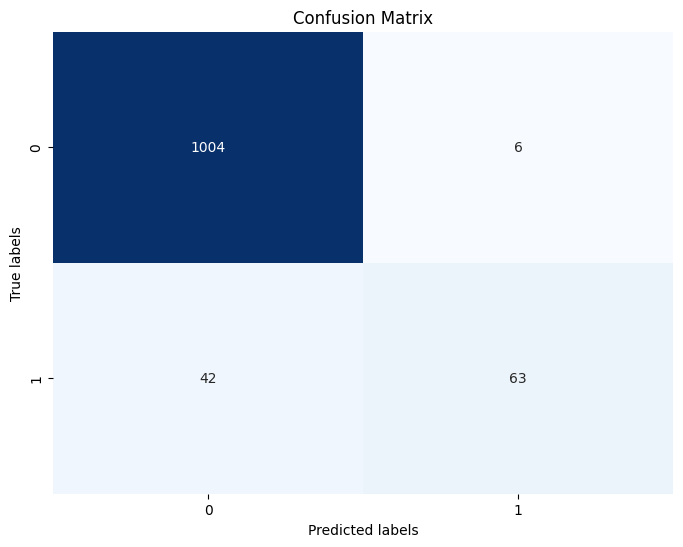

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_pca, preds)
print("Confusion Matrix:\n", conf_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_pca, preds).ravel()
print("TP:", tp) # print True Positive
print("TN:", tn) # print True negative
print("FP:", fp) # print False Positive
print("FN:", fn) # print False Negative

TP: 63
TN: 1004
FP: 6
FN: 42


**Analysis of the Confusion Matrix from the Stacked Model (y_test_pca vs. preds):**
* The model accurately predicted 1,004 instances as 0.
* It misclassified 6 instances as 1, which were originally labeled as 0.
* Additionally, the model incorrectly classified 42 instances as 0 that were originally labeled as 1.
* Moreover, it correctly identified 63 instances as 1

## 🔴 *Classification Report*



In [ ]:
# Get the classification report
report_rf = classification_report(y_test_pca, preds)
print("Classification Report for Stacked Model with Random Forest:\n", report_rf)


Classification Report for Stacked Model with Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1010
           1       0.91      0.60      0.72       105

    accuracy                           0.96      1115
   macro avg       0.94      0.80      0.85      1115
weighted avg       0.96      0.96      0.95      1115



According to the classification report acheived from the stacked model clf on pca variables:
* **Dataset Distribution:** The test dataset consists of 1,010 instances labeled as 0 and 105 instances labeled as 1.
* **Accuracy:** The model achieves an accuracy of 96%, showcasing its overall correct predictions.
* **Precision:** The precision for predicting label 0 is 96%, indicating the model's ability to correctly classify instances as 0. For label 1, the precision is 91%, signifying the model's accuracy in identifying instances as 1. The macro-average precision, which considers both labels equally, stands at 94%. The weighted average precision, accounting for class imbalances, is 96%.
* **Recall:** The recall (sensitivity) for label 0 is 99%, demonstrating the model's capability to capture actual instances labeled as 0. However, for label 1, the recall is 60%, indicating the model's lower performance in correctly identifying instances labeled as 1. The macro-average recall is 80%, and the weighted average recall is 96%.


* **F1-Score:** The F1-score, a balance between precision and recall, for label 0 is 98%, while for label 1, it is 72%. The macro-average F1-score, considering both labels equally, is 85%, and the weighted average F1-score, accounting for class imbalances, stands at 95%.



## 🔴 *Permutation Importance*

In [ ]:
# Import library for permutation importance
from sklearn.inspection import permutation_importance

# Calculating permutation importance using the classifier (clf),
# the transformed PCA test data (X_test_pca), and corresponding labels (y_test_pca).
# n_repeats defines the number of times to permute the feature
result1 = permutation_importance(clf, X_test_pca, y_test_pca, n_repeats=15,
                                random_state=42)

# Sorting the indices of mean importances obtained from permutation importance
perm_sorted_idx = result1.importances_mean.argsort()



In [ ]:
# Get the indices of the top 5 features based on mean importance scores
top_n = 5
top_indices = np.argsort(result1.importances_mean)[-top_n:]

# Get the names of top 5 features
top_feature_names = X_test_pca.columns[top_indices]

print("Top 5 PCA Features:")
print(top_feature_names)

Top 5 PCA Features:
Index(['pca_55', 'pca_5', 'pca_3', 'pca_35', 'pca_1'], dtype='object')


After performing permutation importance analysis on pca-transformed variables using the stacked model that achieved the best F1 score of 0.72,
* Top 5 PCA features:

1.  55
2.  5
3.  3
4.  35
5.  1



### 🟡 *Box Plots*

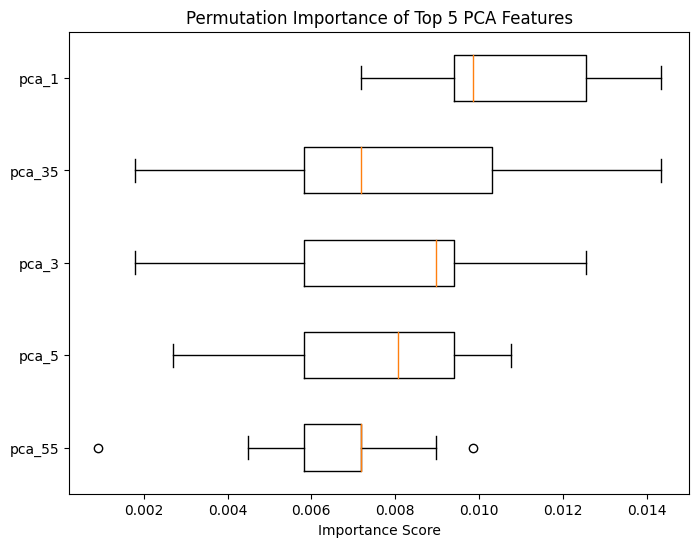

In [ ]:
# Get the indices of the top 5 features based on mean importance scores
top_n = 5
top_indices = np.argsort(result1.importances_mean)[-top_n:]

# Get the names of top 5 features
top_feature_names = X_test_pca.columns[top_indices]

# Extract permutation importance scores for top features
top_feature_importances = result1.importances[top_indices]

# Create a boxplot for the top 5 features
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(top_feature_importances.T, vert=False, labels=top_feature_names)
ax.set_title('Permutation Importance of Top 5 PCA Features')
ax.set_xlabel('Importance Score')
plt.show()

The presented boxplot illustrates the permutation importance of the top 5 PCA features. Notably, variable 1 stands out with the highest importance score median, closely hovering around 0.010.

### 🟡 *Loadings in PCA*

In [ ]:
# to retrive the loadings from pca variables
loadings = pca.components_

# Creating a DataFrame to store the loadings with column names as original feature names
loadings_df = pd.DataFrame(loadings, columns=X_train_plain.columns)

# Display the loadings
print(loadings_df)

     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    -0.006978  -0.032377  -0.013396  -0.002314   0.071464   0.024346   
1     0.000960  -0.025894  -0.034804  -0.089412  -0.027725   0.024546   
2     0.116422   0.038628  -0.034240   0.037823   0.001731   0.021490   
3    -0.015697   0.003615   0.025825  -0.022428  -0.037757   0.032158   
4    -0.027189   0.031182  -0.001920   0.001051   0.023031   0.058618   
..         ...        ...        ...        ...        ...        ...   
240   0.023836   0.041057  -0.126634  -0.012253   0.032084  -0.015424   
241  -0.016787   0.011665  -0.012194  -0.000731  -0.029023   0.020531   
242  -0.009039  -0.041115  -0.032909   0.020698  -0.007097   0.038149   
243  -0.051122   0.005218   0.028688  -0.059517  -0.012176  -0.023492   
244   0.001289  -0.053053   0.032067  -0.008842   0.015650   0.002954   

     feature_6  feature_7  feature_8  feature_9  ...  feature_760  \
0    -0.008474   0.006956   0.035965   0.005347  ...  

In [ ]:
loadings[5]

array([ 3.18712617e-02, -4.43270133e-02, -3.25506193e-02, -3.78606928e-02,
       -3.21060213e-02,  1.79323065e-02, -8.49026929e-02,  9.49155564e-03,
        6.14881432e-02,  2.60699494e-02,  6.43797271e-03,  9.57265676e-03,
       -3.72376047e-02, -2.38125556e-02, -1.18112035e-03,  5.09425957e-02,
        5.24823421e-03,  2.21400449e-02,  1.06781296e-02,  7.05474453e-03,
       -9.45342709e-03,  4.12399864e-02, -1.45512614e-02, -8.11380517e-03,
       -3.49035944e-02,  7.49714804e-02,  3.97524225e-02, -2.53750317e-02,
        2.45551054e-02, -2.11629097e-02,  8.31429395e-03,  4.77203710e-02,
        3.97601352e-02,  1.43095673e-02, -4.53881860e-03,  3.53092467e-02,
       -2.76105135e-02, -8.26282448e-03,  1.27213179e-02,  1.09686991e-01,
        5.24821718e-02,  1.64503682e-02, -5.20183803e-03, -4.56101905e-02,
        5.35280123e-02, -2.18546789e-02,  4.14799644e-02,  1.01754138e-02,
       -1.80611415e-02, -1.84741092e-02, -8.76351064e-03, -5.72653268e-03,
       -1.08182723e-02, -

To understand how each original feature contributes to all the principal components, we implemented loadings in PCA variables.


In [ ]:
# Update top feature names to reflect the original variables
top_feature_names = X_test_plain.columns[top_indices]

# Extract loadings for the top principal components
top_loadings = loadings[:, top_indices]

# Print the contribution of original features to the top principal components
for i, principal_component_idx in enumerate(top_indices):
    print(f"\nTop Original Features for Principal Component {top_indices[i]}:")

    # Get the loading values for the specified principal component
    pc_loadings = top_loadings[:, i]

    # Identify the top contributing original features (e.g., top 5 features)
    top_contributing_features = X_test_plain.columns[np.argsort(np.abs(pc_loadings))[-5:]]

    # Print the top contributing original features for the current principal component
    print(top_contributing_features)


Top Original Features for Principal Component 55:
Index(['feature_38', 'feature_43', 'feature_177', 'feature_71', 'feature_78'], dtype='object')

Top Original Features for Principal Component 5:
Index(['feature_25', 'feature_19', 'feature_43', 'feature_11', 'feature_136'], dtype='object')

Top Original Features for Principal Component 3:
Index(['feature_162', 'feature_246', 'feature_13', 'feature_94', 'feature_1'], dtype='object')

Top Original Features for Principal Component 35:
Index(['feature_20', 'feature_72', 'feature_34', 'feature_6', 'feature_82'], dtype='object')

Top Original Features for Principal Component 1:
Index(['feature_81', 'feature_161', 'feature_116', 'feature_137',
       'feature_241'],
      dtype='object')


We selected the top 5 original features of each principal component. For example, the top 5 original features of principal component 55 are feature_38, feature_43, feature_177, feature_71, and feature_78.

In [ ]:
# Rename PCA columns in X_train_pca from 0,1,2,... to pca_0, pca_1, pca_2,.....respectively
new_column_names = [f'pca_{i}' for i in range(X_train_pca.shape[1])]

# change the column names
X_train_pca.columns = new_column_names

In [ ]:
# Rename PCA columns in X_test_pca from 0,1,2,... to pca_0, pca_1, pca_2,.....respectively
new_column_names = [f'pca_{i}' for i in range(X_test_pca.shape[1])]

# change the column names
X_test_pca.columns = new_column_names

In [ ]:
X_test_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_235,pca_236,pca_237,pca_238,pca_239,pca_240,pca_241,pca_242,pca_243,pca_244
0,-1.901855,0.129624,-0.033382,1.059621,-0.313548,-0.467270,0.076154,-0.702664,-0.218004,-0.135507,...,0.011283,-0.111133,-0.099648,-0.032970,-0.033837,-0.034137,0.035167,0.022339,-0.049249,0.045865
1,-0.020497,0.520657,1.344316,-0.049583,-0.222530,0.171923,-0.114830,0.127895,0.156716,-0.186699,...,0.015858,-0.067357,0.005582,0.020753,0.081468,0.095898,-0.003077,-0.010407,0.026427,0.070052
2,0.431456,1.238732,0.074898,-0.390599,-0.401737,-0.467543,0.373236,-0.295500,-0.071837,0.381942,...,-0.079951,0.001673,0.037771,0.073976,-0.058369,-0.037479,0.018706,-0.003794,0.029890,-0.078784
3,-1.112302,0.660011,-0.148843,-0.916666,-0.429546,0.609396,-0.155581,-0.794826,0.200961,-0.437961,...,-0.015083,0.033223,0.086436,0.088544,-0.029432,-0.088299,0.052948,-0.028920,0.088645,-0.002315
4,-0.877420,1.045464,1.151143,-0.602615,0.050735,-0.305256,-0.123706,0.011230,0.117905,-0.109753,...,-0.219583,0.003594,0.041135,-0.103603,-0.011602,0.060000,0.022812,-0.096304,0.076175,0.020390


To convert the names of PCA variables from 0, 1, 2, 3, 4, ... to pca_0, pca_1, pca_2, pca_3, pca_4, etc.  


Note: to avoid any confusion, we renamed the PCA component 0,1,2,.. as pca_0, pca_1, pca_2....

## 🔴 *Partial Dependence Plots*

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install pulp
!pip install pycebox

#install ice plot packages
from pycebox.ice import ice, ice_plot

### 🟡 *pca_1*

In [ ]:
X_train_pca["pca_1"].nunique()

10029

In [ ]:
tmpdf = ice(data=X_train_pca, # ice needs a dataframe
            column='pca_1', # the column name
                   predict=clf.predict, # the predict statement from the model
            num_grid_points=15) # setting num_grid points
print(np.shape(tmpdf))

(15, 10029)


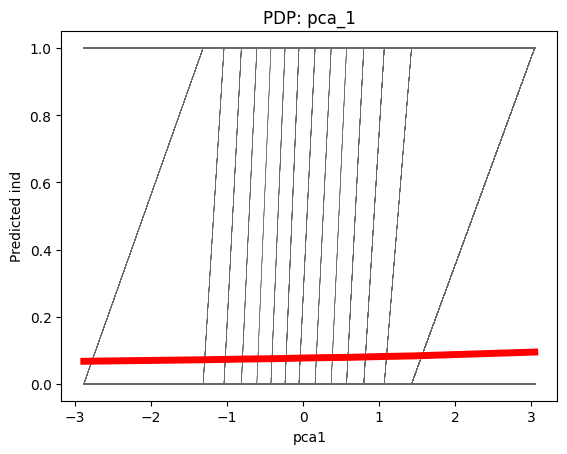

In [ ]:
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: pca_1')
plt.ylabel('Predicted ind')
plt.xlabel('pca1');
plt.show()

Partial Dependency plot for variable pca_1 has 10029 unique values. So for each unique value in pca_1 as there are 10029 rows in X_train_pca, the model will predict "ind" 10029 times for each unique value of pca_1. By implementing hyperparameter tuning num_grid_points =15, we only considered 15 unique values of pca_1, hence we will get an ICE plot for 15 rows (unique rows of pca_1) and 10029 columns.

### 🟡 *pca_35*

In [ ]:
X_train_pca["pca_35"].nunique()

10029

In [ ]:
tmpdf35 = ice(data=X_train_pca, # ice needs a dataframe
            column='pca_35', # the column name
                   predict=clf.predict,  # the predict statement from the model
            num_grid_points=15)
print(np.shape(tmpdf35))

(15, 10029)


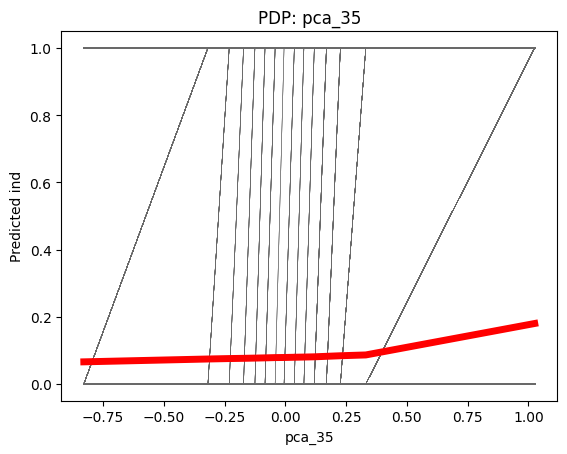

In [ ]:
ice_plot(tmpdf35, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: pca_35')
plt.ylabel('Predicted ind')
plt.xlabel('pca_35');
plt.show()

In pca_35 column there are 10029 unique values. So for each unique value in pca_35 as there are 10029 rows in X_train_pca, the model will predict "ind" 10029 times. By implementing hyperparameter tuning num_grid_points = 15, we only considered 15 unique values of pca_35, hence we will get an ICE plot for 15 rows(unique rows of pca_35) and 10029 columns.

### 🟡*pca_3*

In [ ]:
X_train_pca["pca_3"].nunique()

10029

In [ ]:
tmpdf3 = ice(data=X_train_pca, # ice needs a dataframe
            column='pca_3', # the column name
                   predict=clf.predict,    # the predict statement from the model
            num_grid_points=15)
print(np.shape(tmpdf3))

(15, 10029)


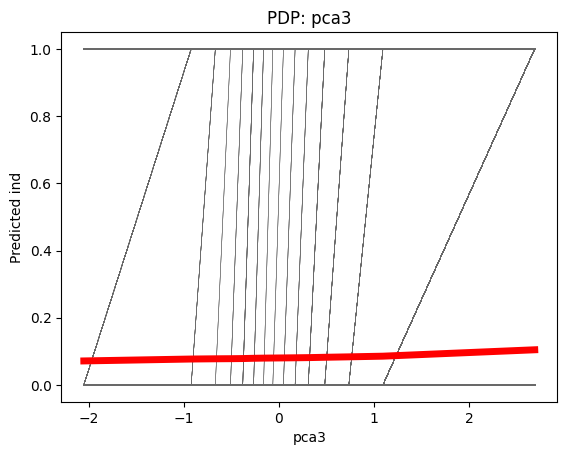

In [ ]:
ice_plot(tmpdf3, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: pca3')
plt.ylabel('Predicted ind')
plt.xlabel('pca3');
plt.show()

In pca_3 feature there are 10029 unique values. So for each unique value in pca_3 as there are 10029 rows in X_train_pca, the model will predict "ind" 10029 times. With the implementation of hyperparameter tuning and the specification of num_grid_points as 15, we intentionally narrow down our focus to just 15 unique values within 'pca_3'. Consequently, this choice leads to the generation of an ICE plot featuring 15 rows (representing unique 'pca_3' values) and 10029 columns.

# 🔵 **Conclusion**



### **Understanding the Models Predicitions Patterns (3)**

**Stacked Model:**

* Stacked Models allow for increased model performance. The process follows two steps known as level 0 and level 1.
  * At level 0, different models, work together, making predictions about the data.
  * Next, the level 1 model is trained using the predictions made by the level 0 models as inputs.

* This technique is effective because each model at level 0 uniquely interprets the data. By combining their predictions, we provide additional insights to the top-level model, enabling it to learn more comprehensively about the patterns and connections in the data.

 **PCA-Based Stacked Model:**

* Composition: This model employs Principal Components Analysis (PCA), followed by RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, and SupportVectorClassifier as estimators at level 0.
* Level 1 Model: Logistic Regression is used as the meta-model at level 1.
  * Performance: The model achieved an F1-score of 0.72

> After identifying the stacked models with the highest F1 scores, we initially implemented permutation importance on 770 variables. Additionally, the stacked model that includes Principal Components Analysis (PCA) also yielded high F1 scores. We then applied permutation importance to the PCA variables, setting 'n_repeats' to 15, to determine their importance.

> To better understand the original features that most contribute to the PCA variables with high importance, we employed loading analysis. This technique reveals how each original feature influences all the principal components. This analysis enabled us to identify the top five original features that significantly contribute to each respective principal component.

### **Project Highlights: (1)**

> Group Eleven met every other day, either in person or online. During these meetings, we reviewed our highs and lows, and planned new practices to implement before our next meeting. Our team excelled at tackling tough problems and learning from each other. Through ***countless*** iterations, we were able to implement new problem-solving techniques. This included experimenting with adding and removing techniques such as SMOTE, PCA, and BORUTA. Our most significant results came from implementing AutoML (TPOT), which introduced us to MLP Classifier, XGBoost, and stacked models. Additionally, we cannot forget to mention the invaluable guidance of Dr. Dave, who was an extremely useful resource.



### **Project Lowlights: (2)**

> A significant area for improvement was the time required to run a model using grid search. With many variables effecting runtime including, limitation to run one model at a time, internet speeds, and limited RAM. To overcome these hurdles, each member invested in a Colab Pro, which provided enhanced computational resources and efficiency. The challenges posed by the modeling process made us more time-conscious and ensured that we diligently tracked outputs. Finally, it emphasized the importance of making adequate adjustments to the parameter grid, aiming to optimize potential gains in the F1 score.

>Another learning opportunity came from reflecting on our initial approach. We initially thought dividing and specializing in different models among team members would be efficient. Jon chose Decision Tree Classifier (DTC) with an F1 score of 0.35, Kritika opted for Random Forest Classifier (RFC) with an F1 score of 0.43, and Kanika worked on Gradient Boosting, achieving an F1 score of 0.5. Since we limited ourselves to these individual models, we made very little progress during the first seven days of modeling.

## 🟣 Other Best Models

### 🟡 Stacked Model on Plain Variables

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier


estimators=[
    ( "RandomForestClassifier", make_pipeline(StandardScaler(),
                                          RandomForestClassifier(random_state=42))),
    ( "GradientBoostingClassifier", make_pipeline(StandardScaler(),
                                          GradientBoostingClassifier(random_state=42))),
    ( "AdaBoostClassifier", make_pipeline(StandardScaler(),
                                          AdaBoostClassifier(random_state=42))),
    ( "LogisticRegression", make_pipeline(StandardScaler(),
                                          LogisticRegression(random_state=42))),
    ( "SVC", make_pipeline(StandardScaler(),
                                          SVC(random_state=42, probability=True)))
]

clf2 = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))

clf2.fit(X_train_plain, y_train_plain)
preds2 = clf2.predict(X_test_plain)
# # Evaluate the stacked model's performance (F1-score)
f1_rf = f1_score(y_test_plain, preds2)
print(f"F1 Score: {f1_rf:.2f}")

# Get the classification report
report_rf = classification_report(y_test_plain, preds2)
print("Classification Report for Stacked Model with Random Forest:\n", report_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1 Score: 0.71
Classification Report for Stacked Model with Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1010
           1       0.88      0.60      0.71       105

    accuracy                           0.95      1115
   macro avg       0.92      0.80      0.84      1115
weighted avg       0.95      0.95      0.95      1115



**Model 2 - Plain Components-based Stacked Model:**

* Composition: This model utilizes original (plain) components without dimension reduction and incorporates RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, LogisticRegression, and SVC as estimators at level 0.
Meta-model: It employs RandomForestClassifier as the meta-model (level 1).
Performance: Attained an F1-score of 0.71.

### 🟡 *TPOT Auto ML*

Automated Machine Learning

In [ ]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=c4622a77c746ad8b70663303358ac8ce2ee8861615ec03dcf29ef2caa4957322
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
# import libraries for TPOT
from tpot import TPOTClassifier
import time

# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTClassifier(generations=5, max_time_mins = 80, verbosity=2)
tpot.fit(X_train_pca, y_train_pca)
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time))
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test_pca, y_test_pca))

# Save best pipeline as Python script file
# make sure you update this path
tpot.export('tpot_AI_text_generation_2.py')

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


61.14 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.01), alpha=0.001, learning_rate_init=0.1)
TPOT classifier finished in 3689.8263149261475 seconds
Best pipeline test accuracy: 0.950


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


# Average CV score on the training set was: 0.9424663167604418
exported_pipeline = MLPClassifier(alpha=0.0001, learning_rate_init=0.01)

exported_pipeline.fit(X_train_pca, y_train_pca)
results1 = exported_pipeline.predict(X_test_pca)


In [ ]:
# Print the classification report
print(classification_report(y_test_pca, results1))

# Print the F1 score
f1 = f1_score(y_test_pca, results1)
print(f"F1 Score: {f1:.2f}")


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1010
           1       0.77      0.64      0.70       105

    accuracy                           0.95      1115
   macro avg       0.87      0.81      0.83      1115
weighted avg       0.94      0.95      0.95      1115

F1 Score: 0.70


Utilized various AutoML techniques via TPOT, ultimately identifying the optimal pipeline employing an MLPClassifier model with specific parameters set to alpha=0.0001 and learning_rate_init=0.01. Achieved a commendable F1 score of 0.70 with this optimized model.